In [1]:
import xarray as xr
import cfgrib
import numpy as np 
import netCDF4
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
insitu_jan = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_jan2009.csv"
insitu_feb = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_feb2009.csv"
insitu_mar = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_mar2009.csv"
insitu_apr = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_apr2009.csv"
insitu_may = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_may2009.csv"
insitu_jun = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_jun2009.csv"
insitu_jul = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_jul2009.csv"
insitu_aug = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_aug2009.csv"
insitu_sep = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_sep2009.csv"
insitu_oct = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_oct2009.csv"
insitu_nov = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_nov2009.csv"
insitu_dec = "/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_dec2009.csv"

df_insitu_jan = pd.read_csv(insitu_jan, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_feb = pd.read_csv(insitu_feb, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_mar = pd.read_csv(insitu_mar, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_apr = pd.read_csv(insitu_apr, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_may = pd.read_csv(insitu_may, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_jun = pd.read_csv(insitu_jun, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_jul = pd.read_csv(insitu_jul, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_aug = pd.read_csv(insitu_aug, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_sep = pd.read_csv(insitu_sep, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_oct = pd.read_csv(insitu_oct, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_nov = pd.read_csv(insitu_nov, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])
df_insitu_dec = pd.read_csv(insitu_dec, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], usecols = ["actual_time","latitude","longitude","air_pressure","observed_value"])

In [3]:
print("jan shape ",df_insitu_jan.shape)
print("feb shape ",df_insitu_feb.shape)
print("mar shape ",df_insitu_mar.shape)
print("apr shape ",df_insitu_apr.shape)
print("may shape ",df_insitu_may.shape)
print("jun shape ",df_insitu_jun.shape)
print("jul shape ",df_insitu_jul.shape)
print("aug shape ",df_insitu_aug.shape)
print("sep shape ",df_insitu_sep.shape)
print("oct shape ",df_insitu_oct.shape)
print("nov shape ",df_insitu_nov.shape)
print("dec shape ",df_insitu_dec.shape)

jan shape  (11948, 5)
feb shape  (9794, 5)
mar shape  (11019, 5)
apr shape  (10891, 5)
may shape  (11744, 5)
jun shape  (9633, 5)
jul shape  (9876, 5)
aug shape  (11466, 5)
sep shape  (11782, 5)
oct shape  (12078, 5)
nov shape  (11450, 5)
dec shape  (12002, 5)


In [4]:
df_insitu = pd.concat([df_insitu_jan, df_insitu_feb, df_insitu_mar, df_insitu_apr, df_insitu_may, df_insitu_jun, df_insitu_jul, df_insitu_aug, df_insitu_sep, df_insitu_oct, df_insitu_nov, df_insitu_dec], ignore_index=True)
df_insitu.head()

,actual_time,longitude,latitude,air_pressure,observed_value
0,2009-01-01 03:11:00+00,11.3439,47.2603,2000,25.00
1,2009-01-01 03:11:00+00,11.3439,47.2603,3000,13.00
2,2009-01-01 03:11:00+00,11.3439,47.2603,5000,11.00
3,2009-01-01 03:11:00+00,11.3439,47.2603,7000,16.00
4,2009-01-01 03:11:00+00,11.3439,47.2603,10000,15.32


In [5]:
df_test = df_insitu.copy()
df_test["actual_time"] = pd.to_datetime(df_test['actual_time'])
hour_values = df_test['actual_time'].dt.hour
filtered_df = df_test[hour_values.isin([23, 2, 5, 8, 11, 14, 17, 20])]
# Get the hour value from each Timestamp object
hour_values = filtered_df['actual_time'].dt.hour

# Modify the time values where hour = 23 by inserting 00:00:00+00
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(year=2009, month=1, day=1) if row['actual_time'].year == 2008 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=0, minute=0, second=0) if row['actual_time'].hour == 23 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=3, minute=0, second=0) if row['actual_time'].hour == 2 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=6, minute=0, second=0) if row['actual_time'].hour == 5 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=9, minute=0, second=0) if row['actual_time'].hour == 8 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=12, minute=0, second=0) if row['actual_time'].hour == 11 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=15, minute=0, second=0) if row['actual_time'].hour == 14 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=18, minute=0, second=0) if row['actual_time'].hour == 17 else row['actual_time'], axis=1)
filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=21, minute=0, second=0) if row['actual_time'].hour == 20 else row['actual_time'], axis=1)


/tmp/ipykernel_11929/2362529268.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(year=2009, month=1, day=1) if row['actual_time'].year == 2008 else row['actual_time'], axis=1)
/tmp/ipykernel_11929/2362529268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['actual_time'] = filtered_df.apply(lambda row: row['actual_time'].replace(hour=0, minute=0, second=0) if row['actual_time'].hour == 23 else row['actua

In [6]:
df_insitu = filtered_df
df_insitu.head(90)

,actual_time,longitude,latitude,air_pressure,observed_value
17,2009-01-01 00:00:00+00:00,7.6125,44.5392,1000,39.59
18,2009-01-01 00:00:00+00:00,7.6125,44.5392,2000,19.00
19,2009-01-01 00:00:00+00:00,7.6125,44.5392,3000,9.29
20,2009-01-01 00:00:00+00:00,7.6125,44.5392,5000,9.28
21,2009-01-01 00:00:00+00:00,7.6125,44.5392,7000,11.83
...,...,...,...,...,...
161,2009-01-01 00:00:00+00:00,17.9567,40.6603,92500,3.10
162,2009-01-01 00:00:00+00:00,17.9567,40.6603,100000,2.60
163,2009-01-01 00:00:00+00:00,13.1883,46.0375,2860,19.00
164,2009-01-01 00:00:00+00:00,13.1883,46.0375,3000,18.50


(3,)


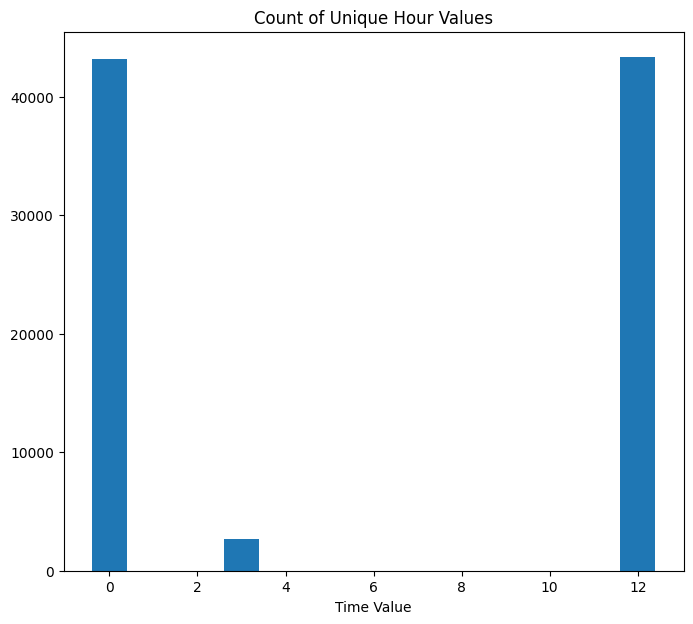

In [7]:
value_counts = df_insitu['actual_time'].dt.hour.value_counts()
print(value_counts.shape)

# Sort the value counts by descending order
value_counts = value_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 7))
# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set the title and x-axis label of the plot
plt.title('Count of Unique Hour Values')
plt.xlabel('Time Value')

# Show the plot
plt.show()

In [8]:
# remove rows that have a hour value different from 00 and 12
df_insitu = df_insitu[df_insitu['actual_time'].dt.hour.isin([0, 12])]

(2,)


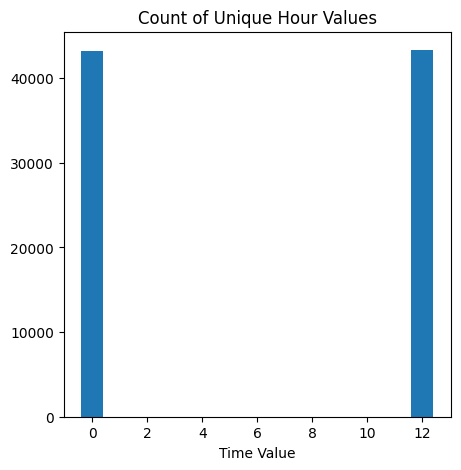

In [9]:
value_counts = df_insitu['actual_time'].dt.hour.value_counts()
print(value_counts.shape)

# Sort the value counts by descending order
value_counts = value_counts.sort_values(ascending=False)

plt.figure(figsize=(5, 5))
# Create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set the title and x-axis label of the plot
plt.title('Count of Unique Hour Values')
plt.xlabel('Time Value')

# Show the plot
plt.show()

In [10]:
# Now fix the pressure
grouped_df = df_insitu.groupby(['actual_time', 'latitude', 'longitude'])
df_insitu = grouped_df.apply(lambda x: x[x['air_pressure'] == x['air_pressure'].max()])
df_insitu.head(13)

actual_time  \
actual_time               latitude longitude                                 
2009-01-01 00:00:00+00:00 37.9142  12.4914   519 2009-01-01 00:00:00+00:00   
                          40.6603  17.9567   162 2009-01-01 00:00:00+00:00   
                                             550 2009-01-01 00:00:00+00:00   
                          41.6700  12.4508   84  2009-01-01 00:00:00+00:00   
                                             474 2009-01-01 00:00:00+00:00   
                          41.9181  8.7928    527 2009-01-01 00:00:00+00:00   
                          44.0969  15.3403   53  2009-01-01 00:00:00+00:00   
                                             439 2009-01-01 00:00:00+00:00   
                          44.5392  7.6125    35  2009-01-01 00:00:00+00:00   
                          44.6539  11.6225   67  2009-01-01 00:00:00+00:00   
                                             453 2009-01-01 00:00:00+00:00   
                          45.4614  9.2831    586 2009-01-01 00:00:00+00:00   
                          46.0375  13.1883   177 2009-01-01 00:00:00+00:00   

                                                  longitude  latitude  \
actual_time               latitude longitude                            
2009-01-01 00:00:00+00:00 37.9142  12.4914   519    12.4914   37.9142   
                          40.6603  17.9567   162    17.9567   40.6603   
                                             550    17.9567   40.6603   
                          41.6700  12.4508   84     12.4508   41.6700   
                                             474    12.4508   41.6700   
                          41.9181  8.7928    527     8.7928   41.9181   
                          44.0969  15.3403   53     15.3403   44.0969   
                                             439    15.3403   44.0969   
                          44.5392  7.6125    35      7.6125   44.5392   
                          44.6539  11.6225   67     11.6225   44.6539   
                                             453    11.6225   44.6539   
                          45.4614  9.2831    586     9.2831   45.4614   
                          46.0375  13.1883   177    13.1883   46.0375   

                                                  air_pressure  observed_value  
actual_time               latitude longitude                                    
2009-01-01 00:00:00+00:00 37.9142  12.4914   519        100000            8.70  
                          40.6603  17.9567   162        100000            2.60  
                                             550        100000            4.10  
                          41.6700  12.4508   84         100000           11.30  
                                             474        100000            8.20  
                          41.9181  8.7928    527        100000            4.11  
                          44.0969  15.3403   53         100000            7.01  
                                             439        100000            4.02  
                          44.5392  7.6125    35          98000            1.00  
                          44.6539  11.6225   67         100000            3.17  
                                             453        100000            5.71  
                          45.4614  9.2831    586        100000            1.50  
                          46.0375  13.1883   177        100000            3.60

In [29]:
df_insitu.shape

(5699, 5)

In [36]:
# for each group if there are multiple values for the same pressure, keep only one with observed value equal to the mean of the multiple observed values
#df_insitu = df_insitu.reset_index()
#grouped_df_test = df_insitu.groupby(['actual_time', 'latitude', 'longitude'])
#df_insitu_test = grouped_df_test.apply(lambda x: x[x['observed_value'] == x['observed_value'].mean()])
#df_insitu.head(13)
df_insitu_test = df_insitu.copy()
df_insitu_test.drop(['latitude', "longitude", "actual_time"], axis=1, inplace=True)

#df_insitu_test = df_insitu_test.reset_index()
#df_insitu_test = df_insitu_test.drop_duplicates(subset=['latitude', 'longitude'], keep='first')
df_insitu_test = df_insitu_test.groupby(['actual_time', 'latitude', 'longitude']).mean().reset_index()
df_insitu_test.head(16)

,actual_time,latitude,longitude,air_pressure,observed_value
0,2009-01-01 00:00:00+00:00,37.9142,12.4914,100000.0,8.700
1,2009-01-01 00:00:00+00:00,40.6603,17.9567,100000.0,3.350
2,2009-01-01 00:00:00+00:00,41.6700,12.4508,100000.0,9.750
3,2009-01-01 00:00:00+00:00,41.9181,8.7928,100000.0,4.110
4,2009-01-01 00:00:00+00:00,44.0969,15.3403,100000.0,5.515
5,2009-01-01 00:00:00+00:00,44.5392,7.6125,98000.0,1.000
6,2009-01-01 00:00:00+00:00,44.6539,11.6225,100000.0,4.440
7,2009-01-01 00:00:00+00:00,45.4614,9.2831,100000.0,1.500
8,2009-01-01 00:00:00+00:00,46.0375,13.1883,100000.0,2.850
9,2009-01-01 00:00:00+00:00,46.8117,6.9425,96600.0,1.000


In [34]:
df_insitu_test.shape

(5693, 5)

In [35]:
# save as csv
df_insitu_test.to_csv("/home/stefano/Public/climate_comparison/data/insitu/insitu_windspeed_2009.csv")

In [13]:
# initialize an axis
# fig, ax = plt.subplots(figsize=(8,6))
# # plot map on axis
# countries = gpd.read_file(  
#      gpd.datasets.get_path("naturalearth_lowres"))
# countries[countries["name"] == "Italy"].plot(color="lightgrey",
#                                                  ax=ax)
# # parse dates for plot's title
# first_month = df_era["time"].min().strftime("%b %Y")
# last_month = df_era["time"].max().strftime("%b %Y")
# # plot points
# df_era.plot(x="longitude", y="latitude", kind="scatter", 
#         c="wind_speed", colormap="viridis", 
#         title=f"ERA5 data in Italy from {first_month} to {last_month}", 
#         ax=ax)

# df.plot(x="longitude", y="latitude", kind="scatter", 
#         c="observed_value", colormap="YlOrRd", 
#         title=f"In situ observations in Italy from {first_month} to {last_month}", 
#         ax=ax)
# # add grid
# ax.grid(alpha=0.5)
# plt.show()